# Kaggle Titanic

### Data preparation

Column | Missing Data | Feature Scaling | Comment
--- |:---:|:---:|:---
PassengerId|||Needed for submission
Survived|||Training label
Pclass||As is|
Name|||Ignored
Sex||Encoded as 0(<) or 1(F)|
Age|Impute with mean|As is|
SibSp|Impute with mean|As is|
Parch|Impute with mean|As is|
Ticket|||Ignored
Cabin|||Ignored
Embarked|||Ignored

### Model
  * 15 hidden layers of 128
  * Dropout .4
  * loss='categorical_crossentropy', optimizer='adam'
  * 500 epochs


### Kaggle score
  * 0.75598


### Change history
Score|Comment
---|:---
0.75598|First attempt
0.73684|Changed Pclass and Sex to one hot encoding
0.72248|Undid the last change and rescaled Parch as well
0.77990|Removed normalization of Age, Parch, SibSp, Pclass
0.75598|Added Fare back in
0.76555|Let's go back one step and change the model to only two layers
0.78947|Reduced epochs to 125, added validation of 0.2

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
train_data = pd.read_csv(r"./data/train.csv")
test_data = pd.read_csv(r"./data/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Delete the data we don't need
cols = ["Name", "Ticket", "Embarked", "Cabin", "Fare"]
train_data.drop(cols, axis=1, inplace=True)
test_data.drop(cols, axis=1, inplace=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
5,6,0,3,male,NaN,0,0
6,7,0,1,male,54.0,0,0
7,8,0,3,male,2.0,3,1
8,9,1,3,female,27.0,0,2
9,10,1,2,female,14.0,1,0


In [6]:
# Fill the NaNs in Age, SibSp and Parch with the mean of the training data of that column
def fillna_n(col,n):
    col.fillna(n, inplace=True)
    
mean_age = train_data["Age"].mean()
mean_sibsp = train_data["SibSp"].mean()
mean_parch = train_data["Parch"].mean()

fillna_n(train_data["Age"], mean_age)
fillna_n(test_data["Age"], mean_age)
fillna_n(train_data["SibSp"], mean_sibsp)
fillna_n(test_data["SibSp"], mean_sibsp)
fillna_n(train_data["Parch"], mean_parch)
fillna_n(test_data["Parch"], mean_parch)

In [7]:
# What NaNs do we still have?
print(train_data.isnull().sum())
print(test_data.isnull().sum())
train_data[train_data.isnull().any(axis=1)]
test_data[test_data.isnull().any(axis=1)]

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64


,PassengerId,Pclass,Sex,Age,SibSp,Parch


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["male","female"])
train_data["Sex"] = le.transform(train_data["Sex"]) 
test_data["Sex"] = le.transform(test_data["Sex"])
# train_data = pd.get_dummies(train_data,columns=["Sex","Pclass"])
# test_data = pd.get_dummies(test_data,columns=["Sex","Pclass"])
# train_data.head()
# train_data.replace({"Sex":{"male":-1,"female":1}},inplace=True)
# test_data.replace({"Sex":{"male":-1,"female":1}},inplace=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# for data in [train_data, test_data]:
#     data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
#     data["SibSp"] = scaler.fit_transform(data["SibSp"].values.reshape(-1,1))
#     data["Parch"] = scaler.fit_transform(data["Parch"].values.reshape(-1,1))
#     data["Pclass"] = scaler.fit_transform(data["Pclass"].values.reshape(-1,1))

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0


In [10]:
train_data.to_csv("./data/train_prepped.csv")
test_data.to_csv("./data/test_prepped.csv")

In [11]:
#save PassengerId for evaluation and remove from data
test_passenger_id=test_data["PassengerId"]
train_data.drop("PassengerId", axis=1, inplace=True)
test_data.drop("PassengerId", axis=1, inplace=True)

y = pd.get_dummies(train_data['Survived'])
x = train_data.drop("Survived", axis=1)

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [13]:
# Split the data into train and validation sets 0.8/0.2
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [23]:
model = Sequential()
model.add(Dense(input_dim=x.shape[1], units=128, kernel_initializer='normal', bias_initializer='zeros'))
model.add(Activation('relu'))

for i in range (0,15):
    model.add(Dense(units=128, kernel_initializer='normal', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Dropout(.4))
    
model.add(Dense(units=2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
hist = model.fit(x.values, y.values, epochs=125, verbose=2, validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/125
0s - loss: 0.6832 - acc: 0.5969 - val_loss: 0.6615 - val_acc: 0.6425
Epoch 2/125
0s - loss: 0.6730 - acc: 0.6096 - val_loss: 0.6550 - val_acc: 0.6425
Epoch 3/125
0s - loss: 0.6700 - acc: 0.6096 - val_loss: 0.6554 - val_acc: 0.6425
Epoch 4/125
0s - loss: 0.6708 - acc: 0.6096 - val_loss: 0.6552 - val_acc: 0.6425
Epoch 5/125
0s - loss: 0.6680 - acc: 0.6096 - val_loss: 0.6419 - val_acc: 0.6425
Epoch 6/125
0s - loss: 0.6702 - acc: 0.6096 - val_loss: 0.6154 - val_acc: 0.6425
Epoch 7/125
0s - loss: 0.6388 - acc: 0.6096 - val_loss: 0.5483 - val_acc: 0.6425
Epoch 8/125
0s - loss: 0.6738 - acc: 0.6096 - val_loss: 0.6166 - val_acc: 0.6425
Epoch 9/125
0s - loss: 0.6516 - acc: 0.6096 - val_loss: 0.5566 - val_acc: 0.6425
Epoch 10/125
0s - loss: 0.6434 - acc: 0.6096 - val_loss: 0.6767 - val_acc: 0.6425
Epoch 11/125
0s - loss: 0.6727 - acc: 0.6096 - val_loss: 0.6459 - val_acc: 0.6425
Epoch 12/125
0s - loss: 0.6538 - acc: 0.6096 - val_loss: 0.65

0s - loss: 0.4770 - acc: 0.7963 - val_loss: 0.3818 - val_acc: 0.8492
Epoch 102/125
0s - loss: 0.4410 - acc: 0.8160 - val_loss: 0.3912 - val_acc: 0.8547
Epoch 103/125
0s - loss: 0.4573 - acc: 0.8160 - val_loss: 0.4009 - val_acc: 0.8436
Epoch 104/125
0s - loss: 0.4718 - acc: 0.8020 - val_loss: 0.4209 - val_acc: 0.8492
Epoch 105/125
0s - loss: 0.4709 - acc: 0.7837 - val_loss: 0.3990 - val_acc: 0.8547
Epoch 106/125
0s - loss: 0.4445 - acc: 0.8090 - val_loss: 0.4002 - val_acc: 0.8659
Epoch 107/125
0s - loss: 0.4520 - acc: 0.8104 - val_loss: 0.3838 - val_acc: 0.8603
Epoch 108/125
0s - loss: 0.4612 - acc: 0.8160 - val_loss: 0.3920 - val_acc: 0.8547
Epoch 109/125
0s - loss: 0.4517 - acc: 0.8104 - val_loss: 0.4160 - val_acc: 0.8603
Epoch 110/125
0s - loss: 0.4572 - acc: 0.8076 - val_loss: 0.4174 - val_acc: 0.8603
Epoch 111/125
0s - loss: 0.4510 - acc: 0.8272 - val_loss: 0.3983 - val_acc: 0.8603
Epoch 112/125
0s - loss: 0.4580 - acc: 0.8118 - val_loss: 0.4299 - val_acc: 0.8492
Epoch 113/125
0s -

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


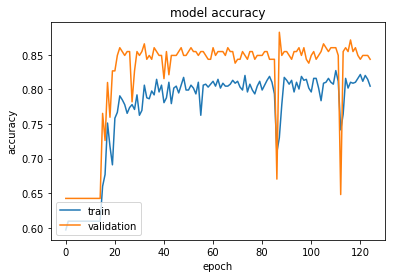

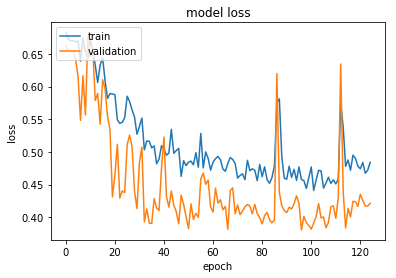

In [25]:
## TODO: Visualize the training and validation loss of your neural network
print(hist.history.keys())

# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
p_survived = model.predict_classes(test_data.values)

 32/418 [=>............................] - ETA: 1s

In [27]:
submission = pd.DataFrame()
submission['PassengerId'] = test_passenger_id
submission['Survived'] = p_survived
submission.to_csv('./data/submission.csv', index=False)